# Quick LSTM Implementation

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
df = pd.read_csv('train_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86085 entries, 0 to 86084
Columns: 2014 entries, date to target_DC1
dtypes: float64(2012), object(2)
memory usage: 1.3+ GB


In [ ]:
df.head()

,date,symbol,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_2003,feature_2004,feature_2005,feature_2006,feature_2007,feature_2008,feature_2009,feature_DC1,target,target_DC1
0,2018-04-29,BTC,0.000000,0.000000,0.965517,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.689655,0.655172,0.655172,0.724138,0.827586,0.827586,0.931034,0.448276,0.758621,0.024718
1,2018-04-29,DLT,0.310345,0.310345,0.137931,0.275862,0.206897,0.517241,0.344828,0.689655,...,0.206897,0.206897,0.379310,0.172414,0.241379,0.379310,0.241379,0.793103,0.517241,-0.005240
2,2018-04-29,ENJ,0.241379,0.068966,0.310345,0.344828,0.103448,0.103448,0.379310,0.206897,...,0.379310,0.344828,0.310345,0.482759,0.655172,0.448276,0.724138,0.724138,0.413793,-0.036471
3,2018-04-29,OMG,0.758621,0.965517,0.896552,0.965517,0.965517,0.965517,0.068966,0.275862,...,0.896552,0.931034,0.896552,0.931034,0.896552,0.896552,0.827586,0.827586,0.275862,-0.066945
4,2018-04-29,UFR,0.620690,0.413793,0.275862,0.413793,0.517241,0.362069,0.758621,0.586207,...,0.482759,0.275862,0.172414,0.551724,0.103448,0.103448,0.137931,0.965517,0.724138,0.020286


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [ ]:
df.shape

(86085, 2013)

In [ ]:
df_stock = df[df.symbol == 'BTC'].copy()
df_stock.drop(['symbol'],1,inplace=True)

c:\Users\Aniruddh\anaconda3\envs\rocket\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
df_stock.shape

(224, 2012)

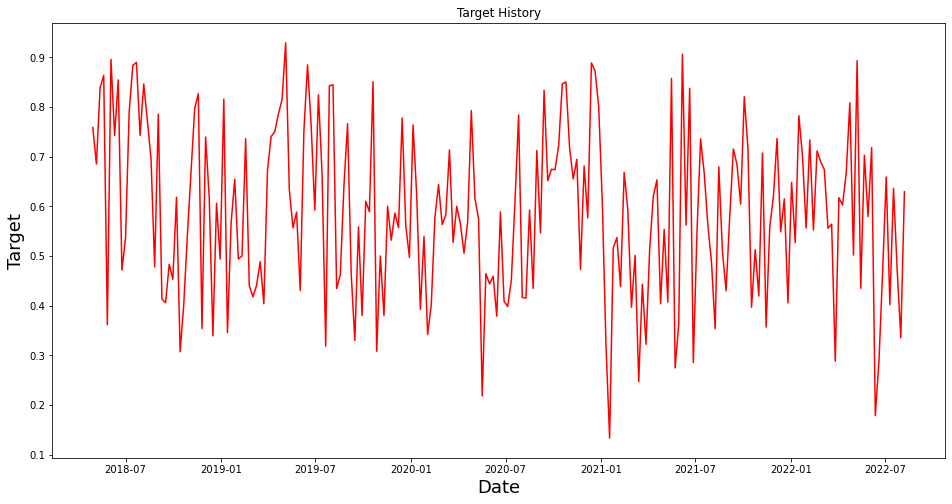

In [ ]:
# Plot
plt.figure(figsize=(16,8))
plt.title('Target History')
plt.plot(df_stock['target'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Target', fontsize = 18)
plt.show()

In [ ]:
# Separate out the target
data = df_stock.filter(['target'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

180

In [ ]:
# Rescale
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.78546056],
       [0.69319083],
       [0.88549417],
       [0.91740993],
       [0.28674307],
       [0.95786456],
       [0.76529865],
       [0.90576565],
       [0.42495007],
       [0.50620056],
       [0.82529314],
       [0.94264565],
       [0.95016558],
       [0.76565409],
       [0.89544362],
       [0.80279123],
       [0.70671143],
       [0.43285241],
       [0.81895234],
       [0.35141566],
       [0.34204316],
       [0.43933411],
       [0.40150499],
       [0.60912572],
       [0.21837779],
       [0.33870966],
       [0.51472393],
       [0.67202745],
       [0.83372045],
       [0.87128067],
       [0.27678107],
       [0.76147976],
       [0.60681229],
       [0.25857745],
       [0.59377292],
       [0.45255827],
       [0.85742995],
       [0.26680436],
       [0.5429023 ],
       [0.65478458],
       [0.45294151],
       [0.46051063],
       [0.75703828],
       [0.38572056],
       [0.35700806],
       [0.38589249],
       [0.44612353],
       [0.339

In [ ]:
# Preparing training data

train_data = scaled_data[0:training_data_len, :]
# Train Test Split (Naive)
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.78546056, 0.69319083, 0.88549417, 0.91740993, 0.28674307,
       0.95786456, 0.76529865, 0.90576565, 0.42495007, 0.50620056,
       0.82529314, 0.94264565, 0.95016558, 0.76565409, 0.89544362,
       0.80279123, 0.70671143, 0.43285241, 0.81895234, 0.35141566,
       0.34204316, 0.43933411, 0.40150499, 0.60912572, 0.21837779,
       0.33870966, 0.51472393, 0.67202745, 0.83372045, 0.87128067,
       0.27678107, 0.76147976, 0.60681229, 0.25857745, 0.59377292,
       0.45255827, 0.85742995, 0.26680436, 0.5429023 , 0.65478458,
       0.45294151, 0.46051063, 0.75703828, 0.38572056, 0.35700806,
       0.38589249, 0.44612353, 0.33960473, 0.67779545, 0.76281994,
       0.7746289 , 0.81983411, 0.85606697, 1.        , 0.62804037,
       0.53184884, 0.5713759 , 0.37338293, 0.7757629 , 0.94411717])]
[0.7904478040897736]



In [ ]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(120, 60, 1)

In [ ]:
# LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [ ]:
# Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train,y_train, batch_size=5, epochs=20)

Epoch 1/20
120/120 [==============================] - 1s 9ms/step - loss: 0.0957
Epoch 2/20
120/120 [==============================] - 1s 5ms/step - loss: 0.0496
Epoch 3/20
120/120 [==============================] - 1s 5ms/step - loss: 0.0455
Epoch 4/20
120/120 [==============================] - 1s 5ms/step - loss: 0.0505
Epoch 5/20
120/120 [==============================] - 1s 5ms/step - loss: 0.0444
Epoch 6/20
120/120 [==============================] - 1s 5ms/step - loss: 0.0433
Epoch 7/20
120/120 [==============================] - 1s 5ms/step - loss: 0.0438
Epoch 8/20
120/120 [==============================] - 1s 5ms/step - loss: 0.0445
Epoch 9/20
120/120 [==============================] - 1s 5ms/step - loss: 0.0426
Epoch 10/20
120/120 [==============================] - 1s 5ms/step - loss: 0.0441
Epoch 11/20
120/120 [==============================] - 1s 5ms/step - loss: 0.0430
Epoch 12/20
120/120 [==============================] - 1s 5ms/step - loss: 0.0435
Epoch 13/20
120/120 [====

In [ ]:
# Create test_data
test_data= scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
# Reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(44, 60, 1)

In [ ]:
# Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.040956666911609076

c:\Users\Aniruddh\anaconda3\envs\rocket\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


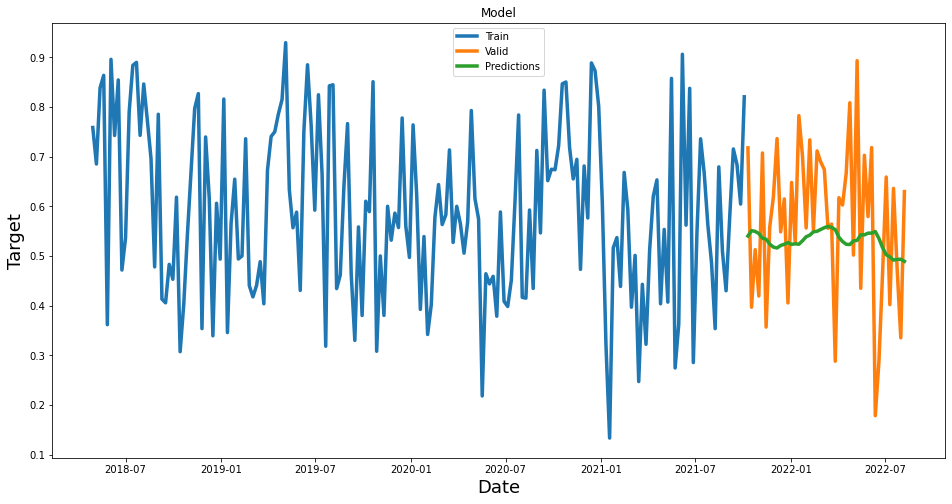

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Target' ,fontsize=18)
plt.plot(train['target'],linewidth=3.5)
plt.plot(valid[['target','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper center')

In [ ]:
valid

,target,Predictions
date,,
2021-10-10,0.717694,0.540204
2021-10-17,0.396857,0.550937
2021-10-24,0.512671,0.549465
2021-10-31,0.419405,0.545161
2021-11-07,0.707317,0.535690
2021-11-14,0.356897,0.533688
2021-11-21,0.558400,0.523893
2021-11-28,0.619048,0.517804
2021-12-05,0.736264,0.516056
